<a href="https://colab.research.google.com/github/aparnaabraham/clothing_fitment_project/blob/main/Copy_of_RECOLOURING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ninja

     |████████████████████████████████| 112kB 4.3MB/s 


In [ ]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing
%cd Self-Correction-Human-Parsing
!mkdir checkpoints
!mkdir inputs
!mkdir outputs

Cloning into 'Self-Correction-Human-Parsing'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 719 (delta 3), reused 4 (delta 0), pack-reused 708
Receiving objects: 100% (719/719), 3.80 MiB | 11.43 MiB/s, done.
Resolving deltas: 100% (145/145), done.
/content/Self-Correction-Human-Parsing


In [ ]:
dataset = 'atr'         #select from ['lip', 'atr', 'pascal']
import gdown
url = 'https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP'
output = 'checkpoints/final.pth'
gdown.download(url, output, quiet=False)

In [ ]:
#import gdown

#if dataset == 'lip':
 #   url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
#elif dataset == 'atr':
 #   url = 'https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP'
#elif dataset == 'pascal':
 #   url = 'https://drive.google.com/uc?id=1E5YwNKW2VOEayK9mWCS3Kpsxf-3z04ZE'

#output = 'checkpoints/final.pth'
#gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP
To: /content/Self-Correction-Human-Parsing/checkpoints/final.pth
267MB [00:01, 198MB/s]


'checkpoints/final.pth'

In [ ]:
#Please select images which you want to upload
%cd inputs
from google.colab import files
uploaded = files.upload()
%cd ..

/content/Self-Correction-Human-Parsing/inputs


Saving M18.jpg to M18.jpg
/content/Self-Correction-Human-Parsing


In [ ]:
!python3 simple_extractor.py --dataset 'atr' --model-restore 'checkpoints/final.pth' --input-dir 'inputs' --output-dir 'outputs'

Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
100% 1/1 [00:01<00:00,  1.01s/it]


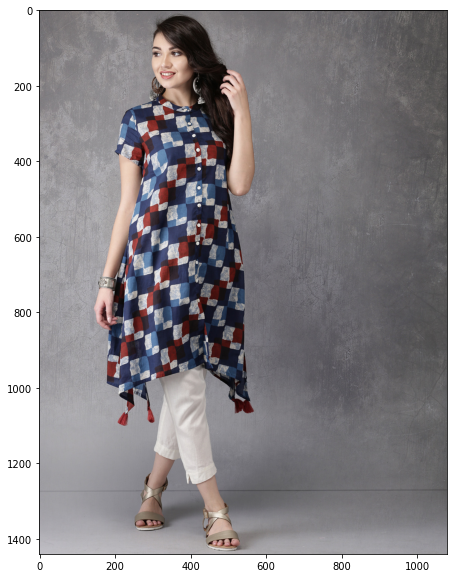

In [ ]:
import cv2
import glob 
import matplotlib.pyplot as plt
path1 = "/content/Self-Correction-Human-Parsing/inputs/*.*"
inp = cv2.imread(glob.glob(path1)[0])
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(inp, cv2.COLOR_BGR2RGB))

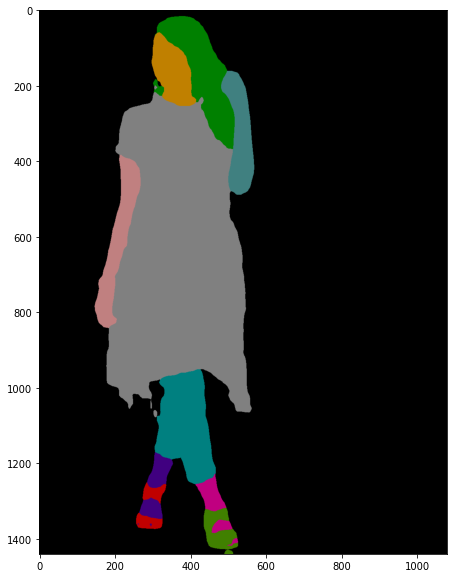

In [ ]:
path2 = "/content/Self-Correction-Human-Parsing/outputs/*.*"
out = cv2.imread(glob.glob(path2)[0])
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

True

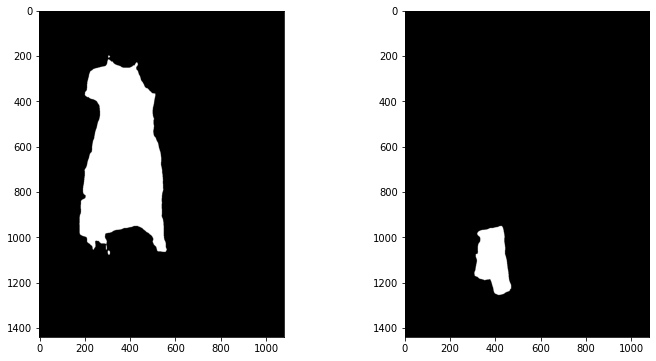

In [ ]:
top=(128,128,128)
bottom=(128,128,0)
mask_top= cv2.inRange(out, top,top)
mask_bottom= cv2.inRange(out, bottom, bottom)
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(cv2.cvtColor(mask_top, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(mask_bottom, cv2.COLOR_BGR2RGB))
cv2.imwrite('top_mask.jpg',mask_top)
cv2.imwrite('bottom_mask.jpg',mask_bottom)

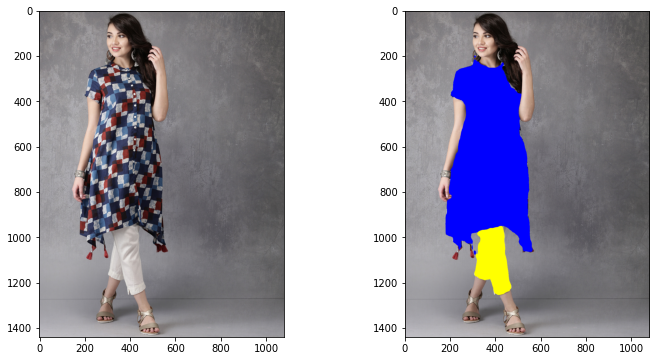

In [ ]:
import numpy as np
tmask=cv2.imread('top_mask.jpg')
bmask=cv2.imread('bottom_mask.jpg')
_, tmask = cv2.threshold(tmask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
_, bmask = cv2.threshold(bmask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
result = np.copy(inp)
result[(tmask==255).all(-1)] = [255,0,0]
result[(bmask==255).all(-1)] = [0,255,255]
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(cv2.cvtColor(inp, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))